
## Test for Reading CSV files
### PH 212 COCC
#### Bruce Emerson 7/27/20

As we have been working with the Arduino to create a data logger which records data on a microSD card. Assuming we format the file appropriately as a csv file the pandas library is delighted to read the data into what's called a data frame. 

This quick notebook is an initial test of that process.


### Dependencies

The new dependency here is the [Pandas](https://pandas.pydata.org/) library which was developed to support data science applications in python. It is classically imported with the alias pd. It is installed as part of your Anaconda package. When you update Anaconda you can also update Pandas.

In [56]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Read csv from Pandas

As we get deeper into python we will need to begin to develop a richer understanding of how python works. We can do this incrementally so don't panic. In Pandas there are a variety of [data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are described in the pandas documentation. There is clearly a lot to learn be we will focus on [data frames](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) which are a data structure that matches our normal understanding of a two dimensional data set.

Notice that this data set (daily covid data for Oregon from [The COVID Tracking Project](https://covidtracking.com/data/download). In the printout of the data set the dots represent additional data not explicitly displayed but it's there.

## Download the data!!

Go to the link above and down load the data for Oregon and save it. I created a data folder to hold this and other data files. The format in the read statement below tells the pd.read_csv function to look in the data folder for a csv file called OregonDailydata.csv. The data is on my git repo but it's not easy to download just that file. Easier for you to go download it.

In [60]:
dataSet = pd.read_csv('data/OregonDailydata.csv')
print(dataSet)

         date state  positive  negative  pending  hospitalizedCurrently  \
0    20200728    OR     17416    370240      NaN                  230.0   
1    20200727    OR     17088    365478      NaN                  237.0   
2    20200726    OR     16758    361717      NaN                  233.0   
3    20200725    OR     16492    357518      NaN                  233.0   
4    20200724    OR     16104    350463      NaN                  233.0   
..        ...   ...       ...       ...      ...                    ...   
142  20200308    OR        14       100     53.0                    NaN   
143  20200307    OR         7        77     40.0                    NaN   
144  20200306    OR         3        64     28.0                    NaN   
145  20200305    OR         3        45     13.0                    NaN   
146  20200304    OR         3        29     18.0                    NaN   

     hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                    1537.0        

### DataFrame Attributes

DataFrame is a python class which is to say it is a creature that has various predefined characteristics called attributes. These are created to make pulling out discrete portions of the data set easier. What I would want you to understand is that these attributes exist and you can recognize them in the code when you see and object like out dataSet (which is a DataFrame) with a .something appended to it. 

Here is a stragtegy if you want to see everything. The dir() command asks python to look at the code in the library that is associated with the class (in this case a DataFrame) and just list all the files in that library. This is definitely overkill but will give you a sense of what's out there. The ones we are most interested in are at the end of the list and are of the from 'name'. 

Once you know about a particular attribute if you search for that attribute you may find a useful guide on the web. Here is the [documentation for the attributes of the DataFrame class](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)


In [ ]:
dir(pd.DataFrame)

### Using Attributes

Here are some examples:

dataSet.index -- tells up how many lines are in the object (notice header + 146 lines = 0 to 147)   
dataSet.columns -- gives me the names of the columns from the header row.  
dataSet.dtypes -- tells me what sort of data is in each column.  

In [28]:
print(dataSet.index)
print(dataSet.columns)
print(dataSet.dtypes)

RangeIndex(start=0, stop=147, step=1)
Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')
date                          int64
state                        object
positive                      int64
negative                      int64
pending              

### Plotting Data from a DataFrame

Now we can use these attributes to plot portions of the data from within the data set as we choose. This can be done more efficiently than I'm going to do it here but I want to be more explicit about what I'm doing for clarity.

I'm going to print out the date data so you can see how it changes in a minute.


In [50]:
dataDate = dataSet['date']
dataPositive = dataSet['positiveIncrease']

print(dataDate)

0      20200728
1      20200727
2      20200726
3      20200725
4      20200724
         ...   
142    20200308
143    20200307
144    20200306
145    20200305
146    20200304
Name: date, Length: 147, dtype: int64


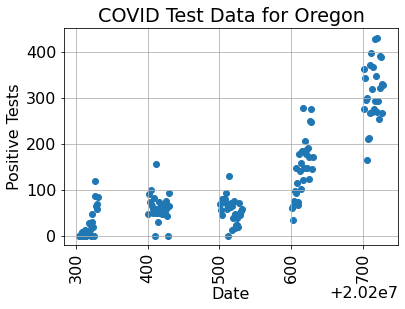

In [51]:
# code cell that creates the plot

fig, ax = plt.subplots()
ax.scatter(dataDate, dataPositive)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Date', ylabel='Positive Tests',
       title='COVID Test Data for Oregon')
ax.grid()

fig.savefig("myplot.png")
plt.show()

### Issues with the Date

So what are those wierd hops in the data? If you stop and look at the date data, which is an integer, there is a 'hop' in the data as the months switch. We need to put that data in a different format so the plotting routine recognizes it as a date. pandas has a tool for that call to_datetime. We feed the tool the original date data and tell it what to expect for the format (year first, day first, what ever - the [format codes you might need are here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).) For this we need a 4 digit year (%Y), and then 2 digit month and day (%m, %d). Pandas reformats the data in a way that the plotting routines recognize as dates rather than numbers. 

In [52]:
dataDate = pd.to_datetime(dataSet['date'], format = '%Y%m%d')
dataPositive = dataSet['positiveIncrease']

print(dataDate)

0     2020-07-28
1     2020-07-27
2     2020-07-26
3     2020-07-25
4     2020-07-24
         ...    
142   2020-03-08
143   2020-03-07
144   2020-03-06
145   2020-03-05
146   2020-03-04
Name: date, Length: 147, dtype: datetime64[ns]


### Plot again

```
plt.xticks(rotation='vertical')
```
rotates the labels on the x axis so they don't overlap and make a mess. Comment out that line of the code and see what happens.

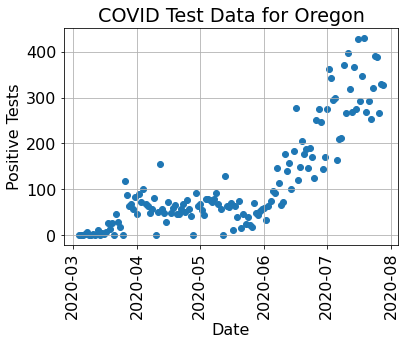

In [54]:
# code cell that creates the plot

fig, ax = plt.subplots()
ax.scatter(dataDate, dataPositive)

plt.rcParams.update({'font.size': 16}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Date', ylabel='Positive Tests',
       title='COVID Test Data for Oregon')
ax.grid()

fig.savefig("myplot.png")
plt.show()

### Conclusion

I think that's enough for now. What we need to do now is generate some of our own data and import the csv data file to plot.